# Exploring the housing dataset

Before we implement our first linear regression model, we will introduce a new dataset, the Housing Dataset, which contains information about houses in the suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978. The Housing Dataset has been made freely available and can be downloaded from the UCI machine learning repository at https://archive.ics.uci.edu/ml/datasets/Housing.



The features of the 506 samples may be summarized as shown in the excerpt of the dataset description:

    CRIM: This is the per capita crime rate by town
    ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
    INDUS: This is the proportion of non-retail business acres per town
    CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
    NOX: This is the nitric oxides concentration (parts per 10 million)
    RM: This is the average number of rooms per dwelling
    AGE: This is the proportion of owner-occupied units built prior to 1940
    DIS: This is the weighted distances to five Boston employment centers
    RAD: This is the index of accessibility to radial highways
    TAX: This is the full-value property-tax rate per 10,000
    PTRATIO: This is the pupil-teacher ratio by town
    B: This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
    LSTAT: This is the percentage lower status of the population
    MEDV: This is the median value of owner-occupied homes in $1000s

For the rest of the exercise we will regard the housing prices **(MEDV)** as our target variable—the variable that we want to predict using one or more of the 13 explanatory variables. Before we explore this dataset further, lets fetch it from the UCI repository into a pandas DataFrame:

In [196]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizing the important characteristics of a dataset

Exploratory Data Analysis (EDA) is an important and recommended first step prior to the training of a machine learning model. In the rest of this section, we will use some simple yet useful techniques from the graphical EDA toolbox that may help us to visually detect the presence of outliers, the distribution of the data, and the relationships between features.

## Scatterplot matrix

First, we will create a scatterplot matrix that allows us to visualize the pair-wise correlations between the different features in this dataset in one place. To plot the scatterplot matrix, we will use the pairplot function from the seaborn library (http://stanford.edu/~mwaskom/software/seaborn/), which is a Python library for drawing statistical plots based on matplotlib:

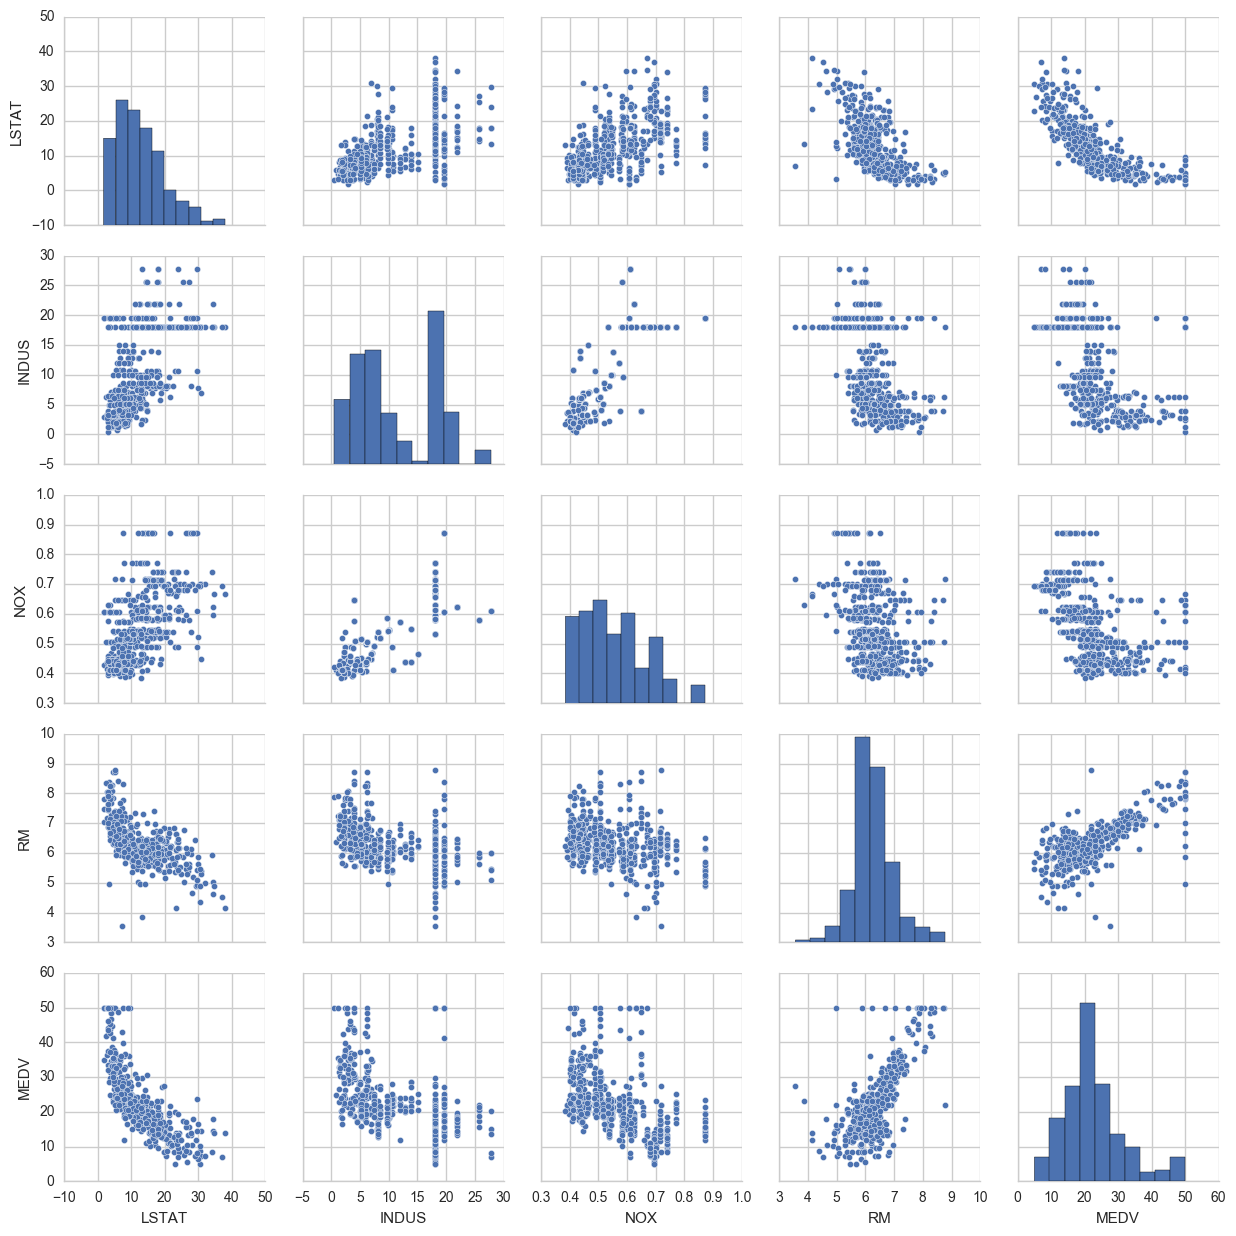

In [197]:
# Note you won't have seaborn with anaconda. 
# Install it using:
# >> pip install seaborn

%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5);
plt.show()



As we can see in the figure, the scatterplot matrix provides us with a useful graphical summary of the relationships in a dataset. 

Using this scatterplot matrix, we can now quickly eyeball how the data is distributed and whether it contains outliers. For example, we can see that there is a linear relationship between **RM** and the housing prices **MEDV** (the fifth column of the fourth row). 

Furthermore, we can see in the histogram (the lower right subplot in the scatter plot matrix) that the **MEDV** variable seems to be normally distributed but contains several outliers.

## Correlation Matrix

The correlation matrix is a square matrix that contains the Pearson  coefficients (often abbreviated as Pearson's r), which measure the linear dependence between pairs of features. 

The correlation coefficients are bounded to the range -1 and 1. 
Two features have:
- a perfect positive correlation if r =1 
- No correlation if r=0 and 
- a perfect negative correlation if r= -1 

Visualizing the important characteristics of a dataset, respectively. As mentioned previously, Pearson's correlation coefficient can simply be calculated as the covariance between two features Visualizing the important characteristics of a dataset and Visualizing the important characteristics of a dataset (numerator) divided by the product of their standard deviations (denominator). 

### Aside Correlation vs Regression

Correlation and Regression are the two analysis based on multivariate distribution. A multivariate distribution is described as a distribution of multiple variables. Correlation is described as the analysis which lets us know the association or the absence of the relationship between two variables ‘x’ and ‘y’. On the other end, Regression analysis, predicts the value of the dependent variable based on the known value of the independent variable, assuming that average mathematical relationship between two or more variables.

Read more: http://keydifferences.com/difference-between-correlation-and-regression.html#ixzz4M8UacH4D

In the following code example, we will use NumPy's corrcoef function on the five feature columns that we previously visualized in the scatterplot matrix, and we will use seaborn's heatmap function to plot the correlation matrix array as a heat map:


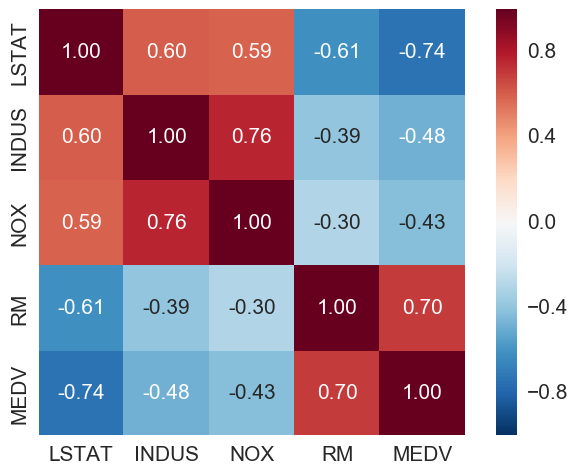

In [198]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)
plt.show()

To fit a linear regression model, we are interested in those features that have a high correlation with our target variable **MEDV**. Looking at the preceding correlation matrix, we see that our target variable MEDV shows the largest correlation with the **LSTAT** variable (-0.74). However, as you might remember from the scatterplot matrix, there is a clear nonlinear relationship between LSTAT and MEDV. 

On the other hand, the correlation between **RM** and **MEDV** is also relatively high (0.70) and given the linear relationship between those two variables that we observed in the scatterplot, RM seems to be a good choice for an exploratory variable to look at a simple linear regression model. 



## Problem 1:

#### 1A:
Answer: Based on Scatterplot: RM is highly correlated. Based on Correlation Matrix: LSTAT and RM are correlated with MEDV.

In [199]:
#1B: Splitting Data into Train and Test
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

X = df[['RM']].values #predictor variable
y = df['MEDV'].values #target variable
#Splitting Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [200]:
#1C: Building a Regression Model
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


In [201]:
#1D Calculating Slope, Intercept, Score, Mean Square Error: 
slr.fit(X,y)
print('OUTPUT:')
print('Slope: ',slr.coef_[0])
print('Intercept: ',slr.intercept_)
print('TrainingSet Score: ',slr.score(X_train,y_train,sample_weight=None))
print('MSE train: ',mean_squared_error(y_train, y_train_pred),', MSE test: ',mean_squared_error(y_test, y_test_pred))


OUTPUT:
Slope:  9.10210898118
Intercept:  -34.6706207764
TrainingSet Score:  0.504583870522
MSE train:  43.9127877267 , MSE test:  42.7496395274


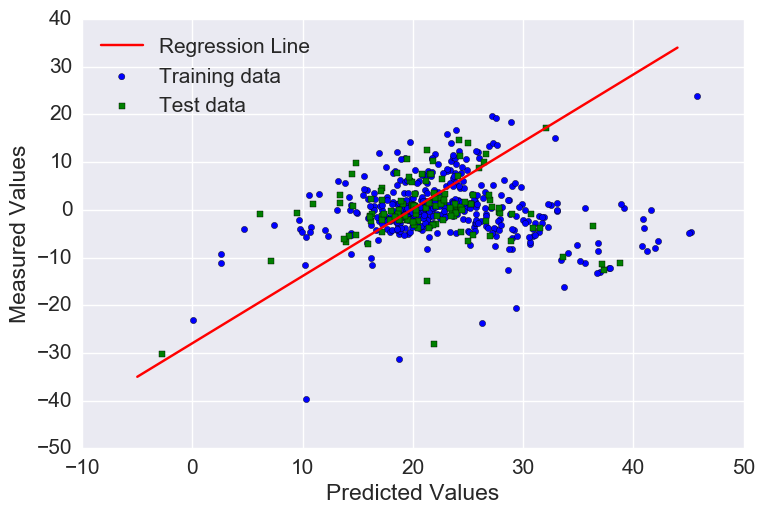

In [202]:
#1E: Plotting Test, Training Data
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='green', marker='s', label='Test data')
X_fit = [-5,44]
y_lin_fit = [-35,34]
plt.plot(X_fit,y_lin_fit,c='red',label='Regression Line')

plt.legend(loc='upper left')
plt.xlabel('Predicted Values')
plt.ylabel('Measured Values')
plt.tight_layout()
plt.show()

## Problem 2:

In [203]:
#2A: Using RM and LSTAT as predictor variables

X = df[['RM','LSTAT']] #predictor
#X1 = df[['RM']].values + df[['LSTAT']].values #predictor
y = df['MEDV'] #target
mseTrainList=[]
mseTestList=[]
variablesList=[2,3,4,13]


#Splitting into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=68)

#Building Regression Model
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

slr.fit(X,y)
print('Question2A OUTPUT:')
print('For RM, LSTAT as predictor variables:')
print('Slope: ',slr.coef_[0])
print('Intercept: ',slr.intercept_)
print('TrainingSet Score: ',slr.score(X_train,y_train,sample_weight=None))
print('MSE train: ',mean_squared_error(y_train, y_train_pred),', MSE test: ',mean_squared_error(y_test, y_test_pred))

mseTrainA = mean_squared_error(y_train, y_train_pred)
mseTestA = mean_squared_error(y_test, y_test_pred)
mseTrainList.append(mseTrainA)
mseTestList.append(mseTestA)

Question2A OUTPUT:
For RM, LSTAT as predictor variables:
Slope:  5.09478798434
Intercept:  -1.35827281187
TrainingSet Score:  0.671820164668
MSE train:  27.2383228362 , MSE test:  46.4381699388


In [204]:
#2B: Using RM, LSTAT, INDUS as predictor variables

X = df[['RM','LSTAT','INDUS']] #predictor
y = df['MEDV'] #target

#Splitting into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=62)

#Building Regression Model
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

slr.fit(X,y)
print('Question2B OUTPUT:')
print('For RM, LSTAT, INDUS as predictor variables:')
print('Slope: ',slr.coef_[0])
print('Intercept: ',slr.intercept_)
print('TrainingSet Score: ',slr.score(X_train,y_train,sample_weight=None))
print('MSE train: ',mean_squared_error(y_train, y_train_pred),', MSE test: ',mean_squared_error(y_test, y_test_pred))

mseTrainB = mean_squared_error(y_train, y_train_pred)
mseTestB = mean_squared_error(y_test, y_test_pred)
mseTrainList.append(mseTrainB)
mseTestList.append(mseTestB)

Question2B OUTPUT:
For RM, LSTAT, INDUS as predictor variables:
Slope:  5.07379366079
Intercept:  -0.968652488404
TrainingSet Score:  0.641458492732
MSE train:  29.1829333093 , MSE test:  35.267406305


In [205]:
#2C: Using RM, LSTAT, INDUS, NOX as predictor variables

X = df[['RM','LSTAT','INDUS','NOX']] #predictor
y = df['MEDV'] #target

#Splitting into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)

#Building Regression Model
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

slr.fit(X,y)
print('Question2C OUTPUT:')
print('For RM, LSTAT, INDUS, NOX as predictor variables:')
print('Slope: ',slr.coef_[0])
print('Intercept: ',slr.intercept_)
print('TrainingSet Score: ',slr.score(X_train,y_train,sample_weight=None))
print('MSE train: ',mean_squared_error(y_train, y_train_pred),', MSE test: ',mean_squared_error(y_test, y_test_pred))

mseTrainC = mean_squared_error(y_train, y_train_pred)
mseTestC = mean_squared_error(y_test, y_test_pred)
mseTrainList.append(mseTrainC)
mseTestList.append(mseTestC)

Question2C OUTPUT:
For RM, LSTAT, INDUS, NOX as predictor variables:
Slope:  5.05580497595
Intercept:  -1.20168874758
TrainingSet Score:  0.643255955851
MSE train:  30.9004791898 , MSE test:  28.4106887011


In [206]:
#2D: Using All 13 variables as predictor

# All 13 variables as predictor
#X = df[['CRIM']].values + df[['ZN']].values + df[['INDUS']].values + df[['CHAS']].values + df[['NOX']].values + df[['RM']].values + df[['AGE']].values + df[['DIS']].values + df[['RAD']].values + df[['TAX']].values + df[['PTRATIO']].values + df[['B']].values + df[['LSTAT']].values
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV'] #target

#Splitting into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

#Building Regression Model
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

slr.fit(X,y)
print('Question2D OUTPUT:')
print('For all 13 variables as predictor variables:')
print('Slope: ',slr.coef_[0])
print('Intercept: ',slr.intercept_)
print('TrainingSet Score: ',slr.score(X_train,y_train,sample_weight=None))
print('MSE train: ',mean_squared_error(y_train, y_train_pred),', MSE test: ',mean_squared_error(y_test, y_test_pred))

mseTrainD = mean_squared_error(y_train, y_train_pred)
mseTestD = mean_squared_error(y_test, y_test_pred)
mseTrainList.append(mseTrainD)
mseTestList.append(mseTestD)

Question2D OUTPUT:
For all 13 variables as predictor variables:
Slope:  -0.108011357837
Intercept:  36.4594883851
TrainingSet Score:  0.741964341033
MSE train:  22.1242386024 , MSE test:  23.4314099332


Question2E OUTPUT:
Variables:          [2, 3, 4, 13]
MSE Training List:  [27.238322836196943, 29.182933309338935, 30.900479189769776, 22.124238602377197]
MSE Test List:      [46.438169938785158, 35.267406305034008, 28.41068870108036, 23.431409933226945]


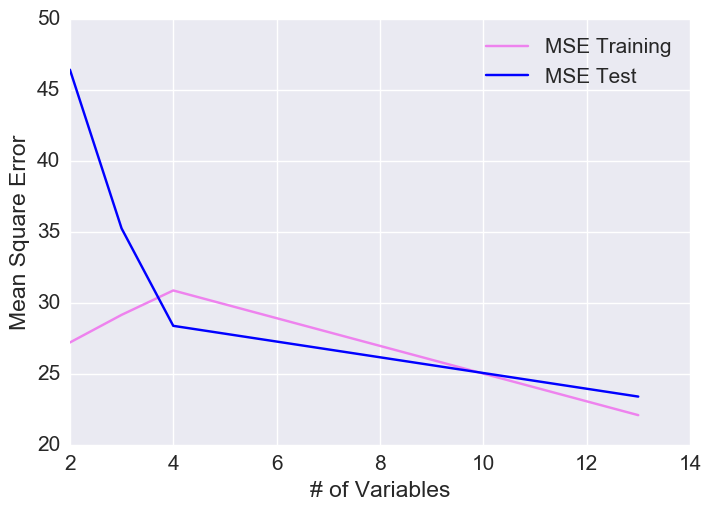

In [207]:
#2E: Plotting MSE Training and Test Data
print('Question2E OUTPUT:')
print('Variables:         ',variablesList)
print('MSE Training List: ',mseTrainList)
print('MSE Test List:     ',mseTestList)

fig, ax = plt.subplots()
ax.plot(variablesList,mseTrainList,c='violet', label='MSE Training')
ax.plot(variablesList,mseTestList,c='blue',label='MSE Test')
ax.legend(loc='upper right')
plt.xlabel('# of Variables')
plt.ylabel('Mean Square Error')
plt.show()

### Observation:
We can see from above graph that both lines of Training and Test have converged when we had 4 variables in our set and this gives us our learning curve. So adding more data will not help because when we are all the 13 variables in the last case our lines have slowly started to diverge from each other and giving error again.